# Naive Bayes 

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# reading files

df = pd.read_csv(r"D:\SDBI\4th Semester\Mashine Learning\Datasets\pima-indians-diabetes.csv")

In [3]:
# looking at the data

display(df.head(),df.tail(),df.sample(5))

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
8,2,197,70,45,543,30.5,0.158,53,1
242,3,139,54,0,0,25.6,0.402,22,1
462,8,74,70,40,49,35.3,0.705,39,0
333,12,106,80,0,0,23.6,0.137,44,0
127,1,118,58,36,94,33.3,0.261,23,0


In [4]:
# checking the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


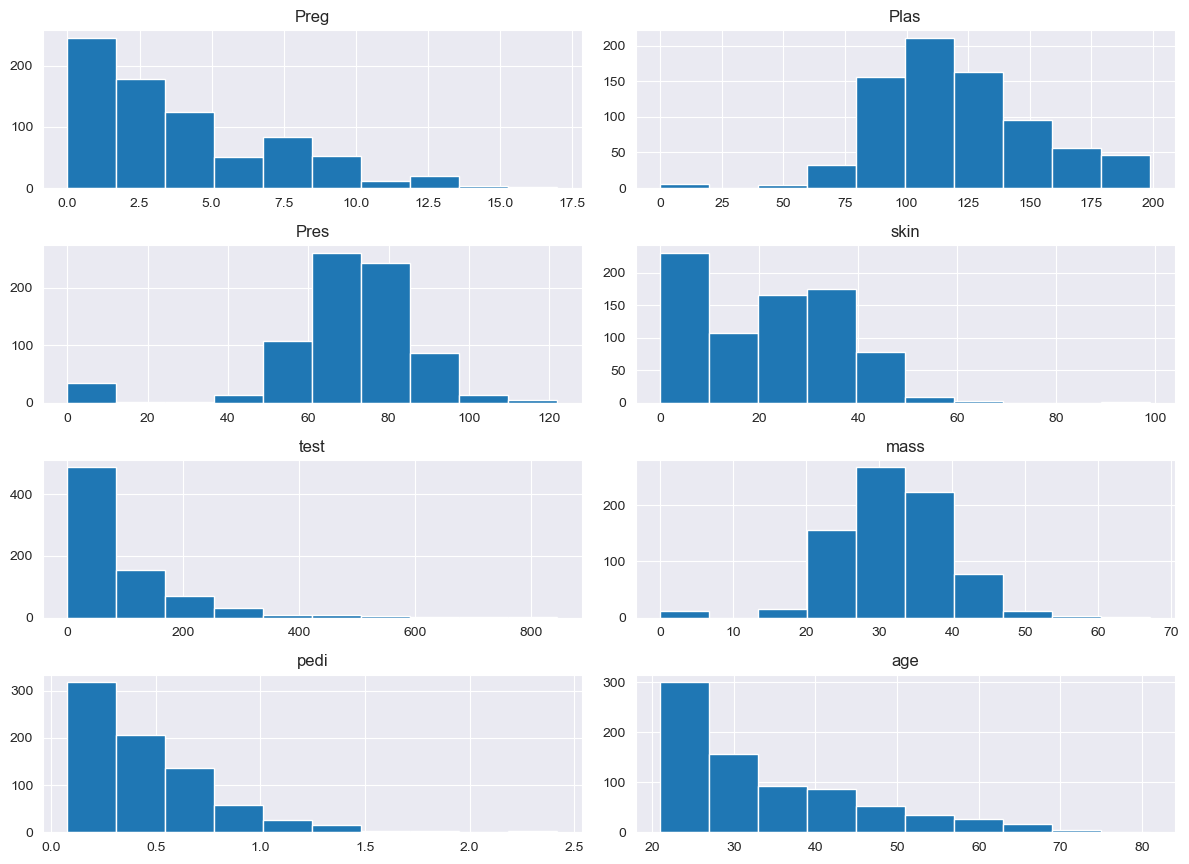

In [5]:
# checking the distribution of data

columns = list(df)[0:-1]
df[columns].hist(figsize = (12,30),layout = (14,2));
plt.tight_layout()
plt.show();

# Identifying Correlation in data



In [6]:
df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


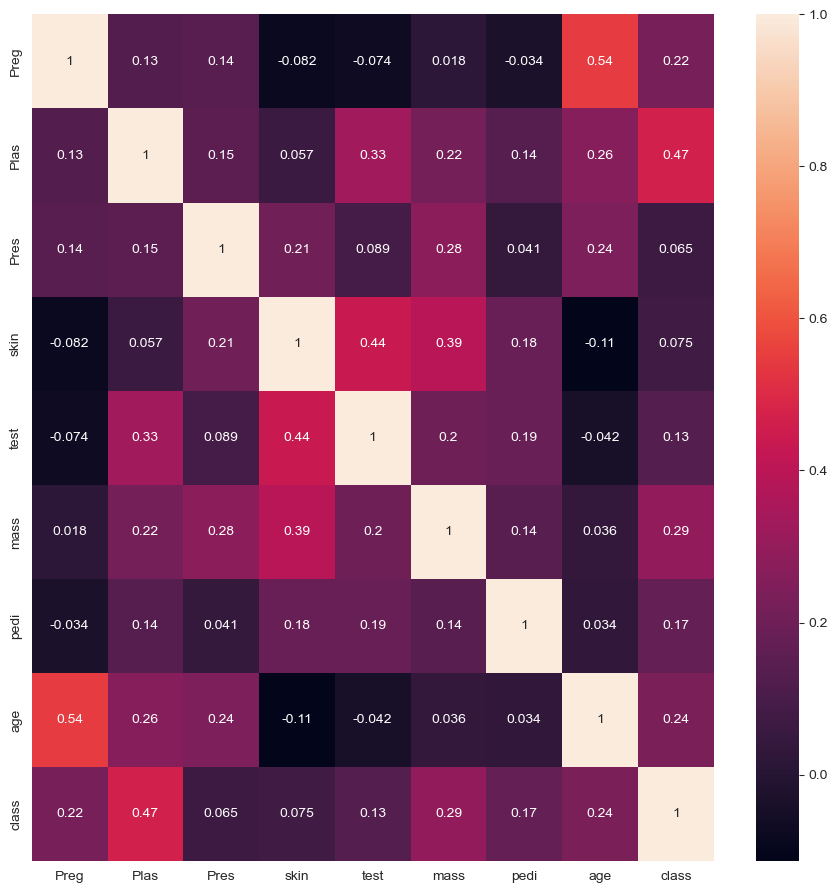

In [7]:
cp = df.corr()
fig,axes = plt.subplots(figsize = (11,11))
sns.heatmap(cp,annot = True)
plt.show();

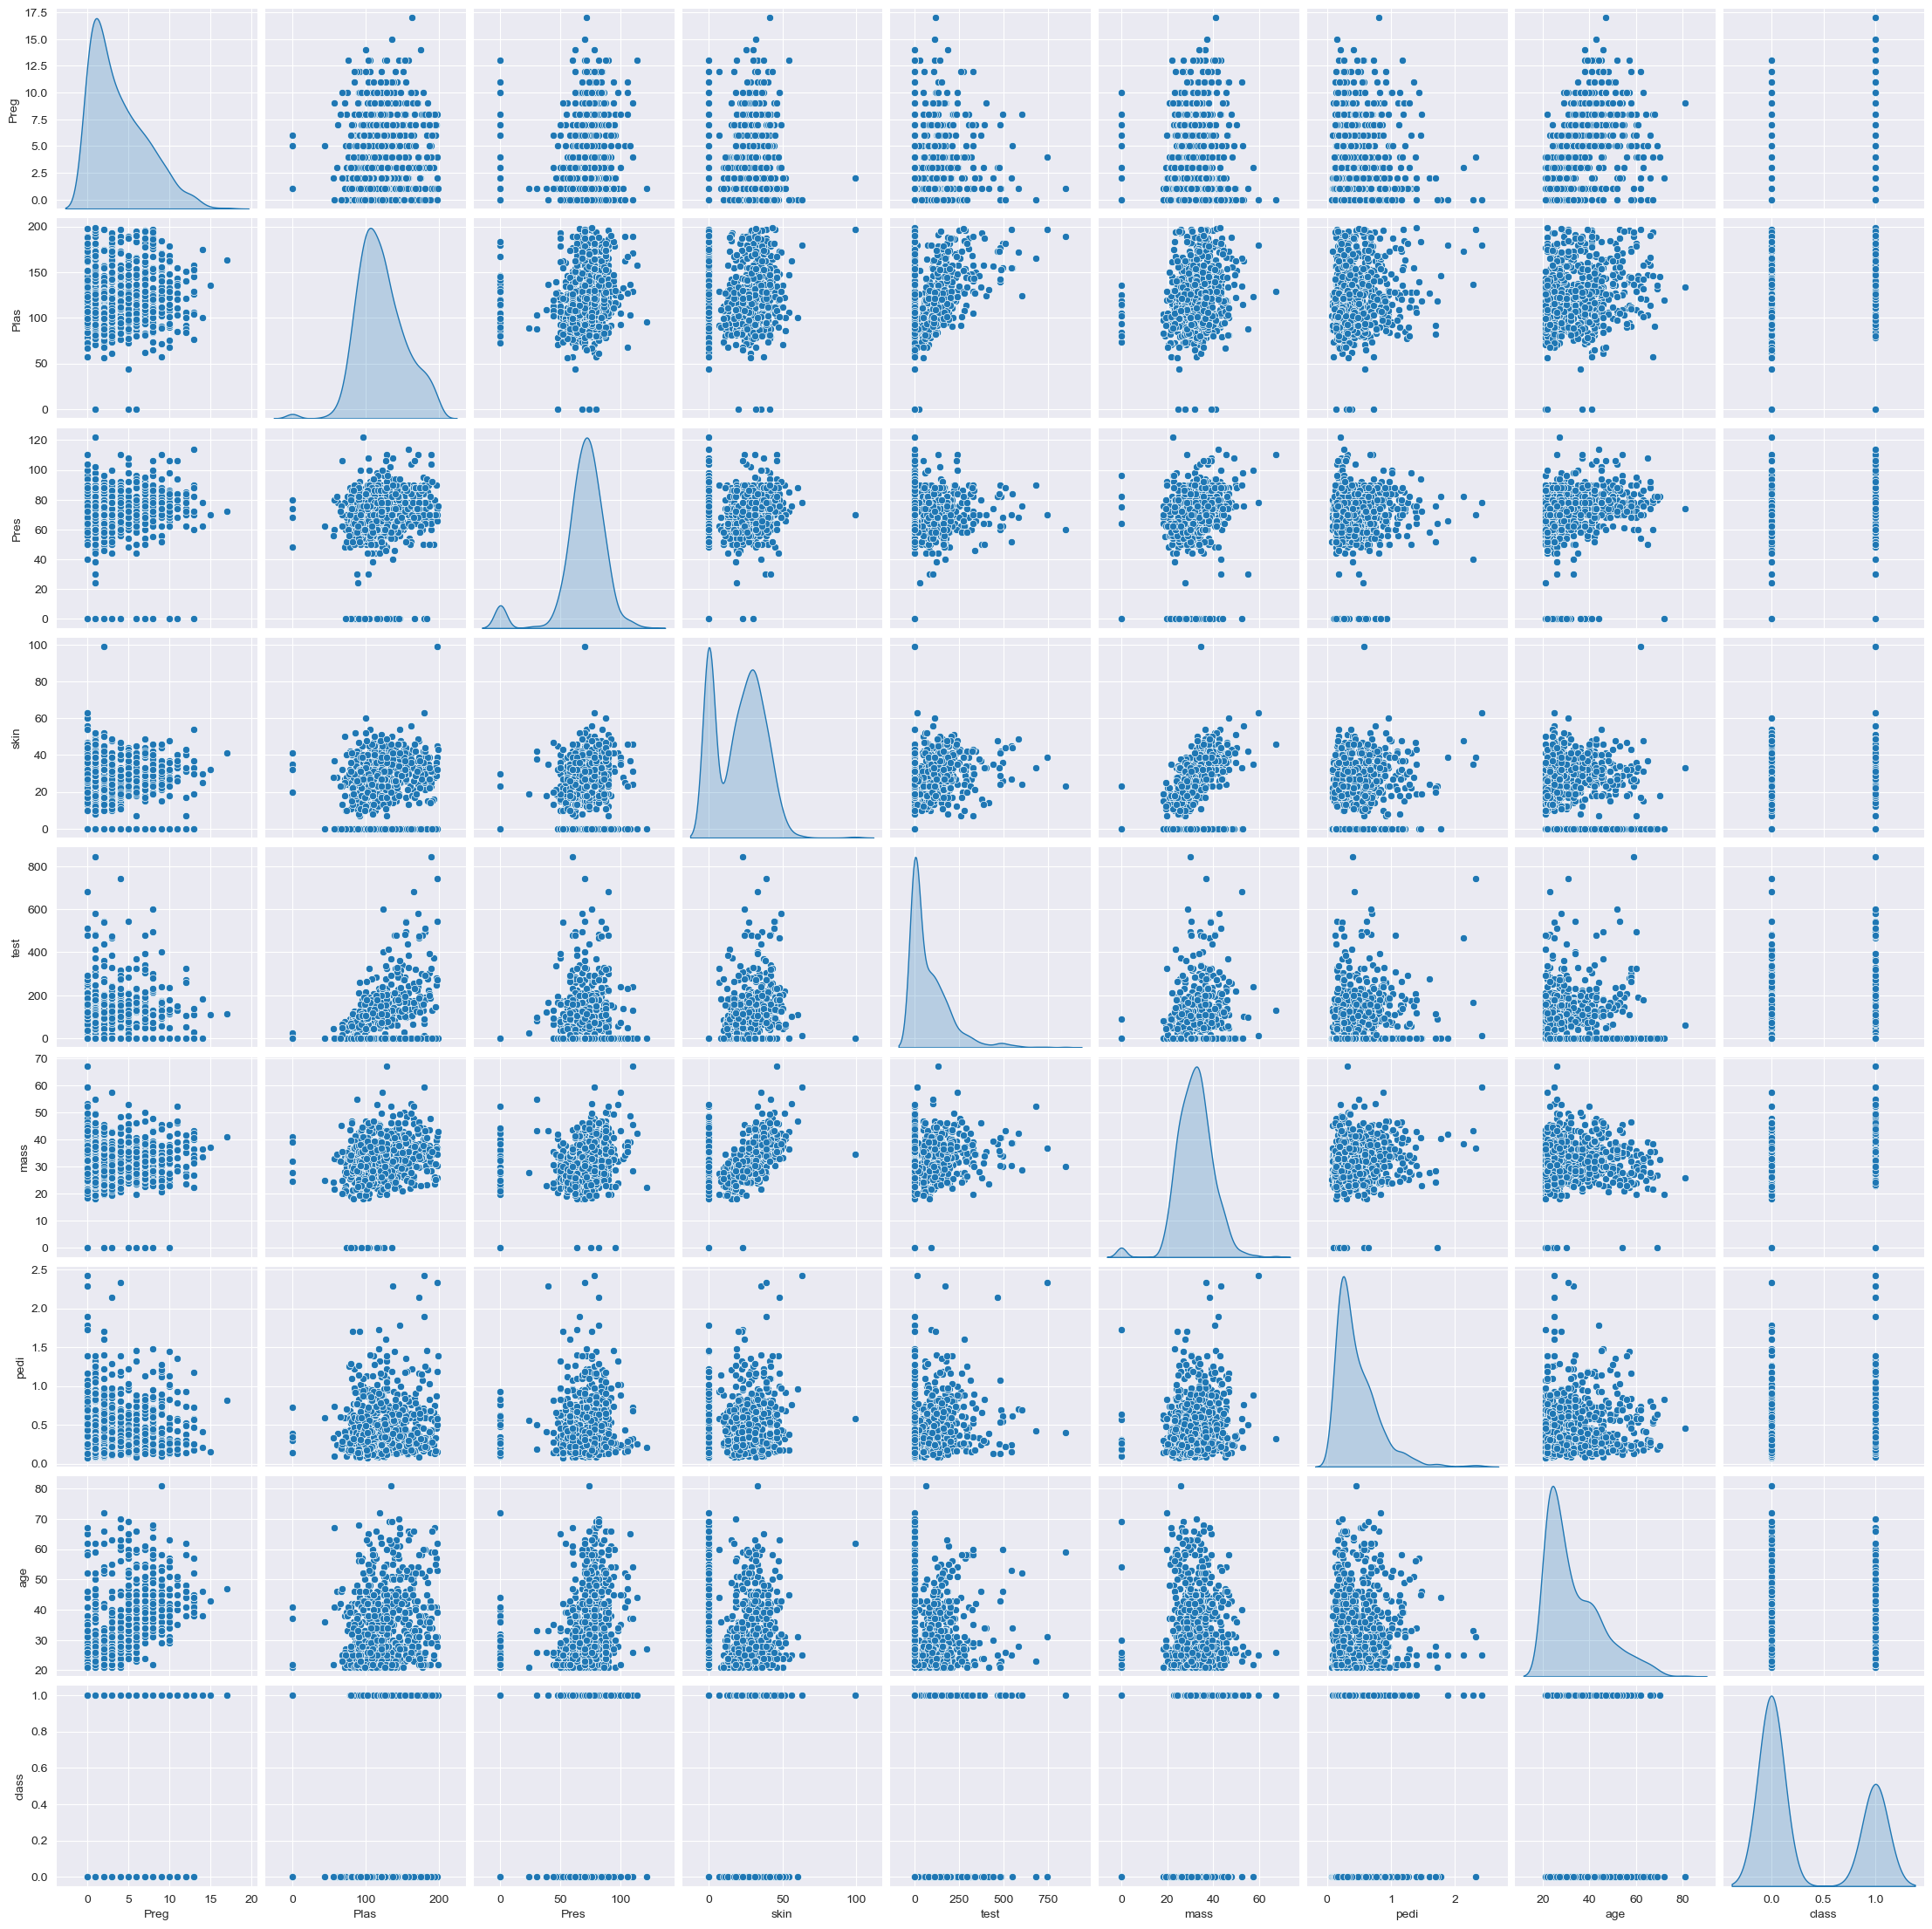

In [8]:
sns.pairplot(df,diag_kind = 'kde')
plt.show();

# Calculate diabities ratio for True/False from outcome variable


In [9]:
# calculating no of true and false values from class column 
n_true = len(df.loc[df['class'] == True])
n_false = len(df.loc[df['class'] == False])

# taking ratio of True or False values from above calculation  
print("Number of true cases : ",n_true,round(n_true/786,4)*100,"%")
print("Number of false cases : ",n_false,round(n_false/786,4)*100,"%")

Number of true cases :  268 34.1 %
Number of false cases :  500 63.61 %


# Splitting the Data


In [10]:
# importing library for train test spilt
from sklearn.model_selection import train_test_split

# creating a independent variable x excuding class field
x = df.drop('class',axis = 1)
# creating a dependent variable y of class field
y = df['class']

In [11]:
# spliting the data by 30-70 ratio

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


# Data Preparation

## checking for missing values 

### Replacing the column names with actual names


In [12]:
# replacing all the zero's with the column mean

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=0,strategy='mean' )

In [13]:
col = x_train.columns

In [14]:
x_train = pd.DataFrame(imputer.fit_transform(x_train))
x_test = pd.DataFrame(imputer.fit_transform(x_test))


In [15]:
x_train.columns  = col
x_test.columns = col

In [16]:
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


# Training Naive Bayes Algorithm

In [17]:
# importing library
from sklearn.naive_bayes import GaussianNB

In [18]:
# creating the model
diab_model = GaussianNB()

# fitting the model
diab_model.fit(x_train,y_train.ravel())

GaussianNB()

In [19]:
# predicting the y using training dataset
diab_train_predict = diab_model.predict(x_train)

In [20]:
# importing library for checking the accuracy
from sklearn import metrics

In [21]:
# checking the accuracy
metrics.accuracy_score(y_train,diab_train_predict)

0.7392923649906891

In [22]:
# creating a confusion matrix

cm = metrics.confusion_matrix(y_train,diab_train_predict,labels = [1,0])

In [23]:
cm_display = metrics.ConfusionMatrixDisplay(cm,display_labels=[True,False])

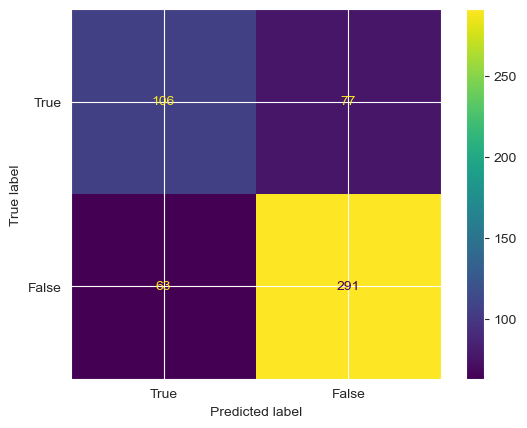

In [42]:
cm_display.plot();

In [29]:
print(metrics.classification_report(y_train,diab_train_predict,labels = [1,0]))

              precision    recall  f1-score   support

           1       0.63      0.58      0.60       183
           0       0.79      0.82      0.81       354

    accuracy                           0.74       537
   macro avg       0.71      0.70      0.70       537
weighted avg       0.74      0.74      0.74       537



# ROC

In [30]:
# predicting the y test by using x test
prob = diab_model.predict(x_test)

In [32]:
# getting the coefficients of roc
fpr,tpr,threshold = metrics.roc_curve(y_test,prob)

In [34]:
# we are gettig the area under curve(used to compare models)
auc = metrics.auc(fpr,tpr)

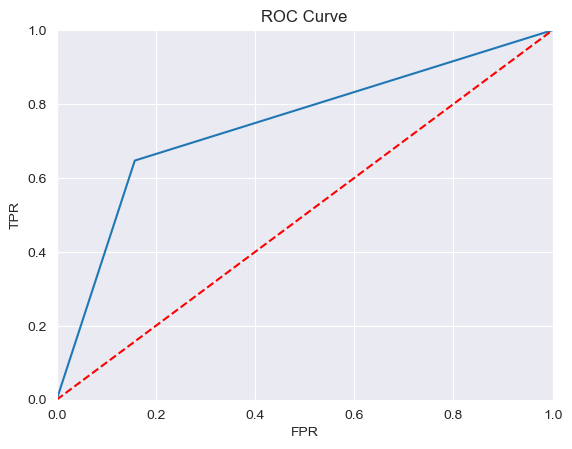

In [41]:
# plotting the roc curve
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()